In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#Read the Data File and store into Pandas DataFrames
filepath="../Resource/labs.csv"
df= pd.read_csv(filepath)
df.head(10)

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,0.062,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1
5,73562,123.0,123.0,74.0,6541.6,166.22,NaN,NaN,NaN,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,750.0,553.5
6,73563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,73564,19.0,19.0,242.0,21392.8,7.85,134054.109760,77.0,0.77,3.9,...,0.253,0.0,0.115,0.0,0.0309,0.0,NaN,21.28,668.0,493.0
8,73566,1.3,1.3,18.0,1591.2,7.22,NaN,NaN,NaN,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378.0,279.0
9,73567,35.0,35.0,215.0,19006.0,16.28,NaN,NaN,NaN,4.0,...,0.148,0.0,0.078,0.0,0.0436,0.0,NaN,6.07,194.0,143.2


In [3]:
#defining the selected variables and extracting the table from the main data
cols_to_clean = ['SEQN','LBXTHG', 'LBXBSE', 'LBXBPB', 'LBXBMN', 'LBXBCD', 'LBXTR', 'LBDLDL', 'LBDHDD']
variable_df=df[cols_to_clean]
variable_df.head()

,SEQN,LBXTHG,LBXBSE,LBXBPB,LBXBMN,LBXBCD,LBXTR,LBDLDL,LBDHDD
0,73557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0
1,73558,1.21,204.73,1.69,8.15,0.20,NaN,NaN,50.0
2,73559,1.27,209.64,1.45,9.57,0.22,51.0,56.0,60.0
3,73560,0.88,169.82,0.37,13.07,0.07,NaN,NaN,61.0
4,73561,NaN,NaN,NaN,NaN,NaN,75.0,101.0,85.0


In [4]:
#dropping the rows with null cells
for col in variable_df:
    variable_df = variable_df.dropna(subset=[col])

In [5]:
variable_df.dtypes

SEQN        int64
LBXTHG    float64
LBXBSE    float64
LBXBPB    float64
LBXBMN    float64
LBXBCD    float64
LBXTR     float64
LBDLDL    float64
LBDHDD    float64
dtype: object

In [6]:
#renaming the variables
df2=variable_df.rename(columns={
    "SEQN":"patient ID",
    "LBXTHG":"mercury (ug/L)", 
    "LBXBSE":"selenium(ug/L)", 
    "LBXBPB":"lead(ug/dL)", 
    "LBXBMN": "manganese(ug/L)", 
    "LBXBCD":"cadmium(ug/L)", 
    "LBXTR":"triglycerides(mg/dL)", 
    "LBDLDL":"LDL-cholesterol(mg/dL)", 
    "LBDHDD":"HDL-Cholesterol(mg/dL)"
})

In [7]:
#double check the clean data
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1555 entries, 2 to 9799
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patient ID              1555 non-null   int64  
 1   mercury (ug/L)          1555 non-null   float64
 2   selenium(ug/L)          1555 non-null   float64
 3   lead(ug/dL)             1555 non-null   float64
 4   manganese(ug/L)         1555 non-null   float64
 5   cadmium(ug/L)           1555 non-null   float64
 6   triglycerides(mg/dL)    1555 non-null   float64
 7   LDL-cholesterol(mg/dL)  1555 non-null   float64
 8   HDL-Cholesterol(mg/dL)  1555 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 121.5 KB


In [8]:
df2.head()

,patient ID,mercury (ug/L),selenium(ug/L),lead(ug/dL),manganese(ug/L),cadmium(ug/L),triglycerides(mg/dL),LDL-cholesterol(mg/dL),HDL-Cholesterol(mg/dL)
2,73559,1.27,209.64,1.45,9.57,0.22,51.0,56.0,60.0
7,73564,0.42,195.62,1.00,16.80,0.37,64.0,97.0,58.0
21,73580,0.46,188.00,0.31,4.22,0.07,57.0,159.0,55.0
48,73607,0.33,219.00,1.35,8.31,0.50,139.0,103.0,30.0
62,73621,0.87,212.84,1.38,8.14,0.36,78.0,70.0,75.0


In [9]:
# Reset Index
lab_df = df2.reset_index(drop = True)
lab_df.head()

,patient ID,mercury (ug/L),selenium(ug/L),lead(ug/dL),manganese(ug/L),cadmium(ug/L),triglycerides(mg/dL),LDL-cholesterol(mg/dL),HDL-Cholesterol(mg/dL)
0,73559,1.27,209.64,1.45,9.57,0.22,51.0,56.0,60.0
1,73564,0.42,195.62,1.00,16.80,0.37,64.0,97.0,58.0
2,73580,0.46,188.00,0.31,4.22,0.07,57.0,159.0,55.0
3,73607,0.33,219.00,1.35,8.31,0.50,139.0,103.0,30.0
4,73621,0.87,212.84,1.38,8.14,0.36,78.0,70.0,75.0


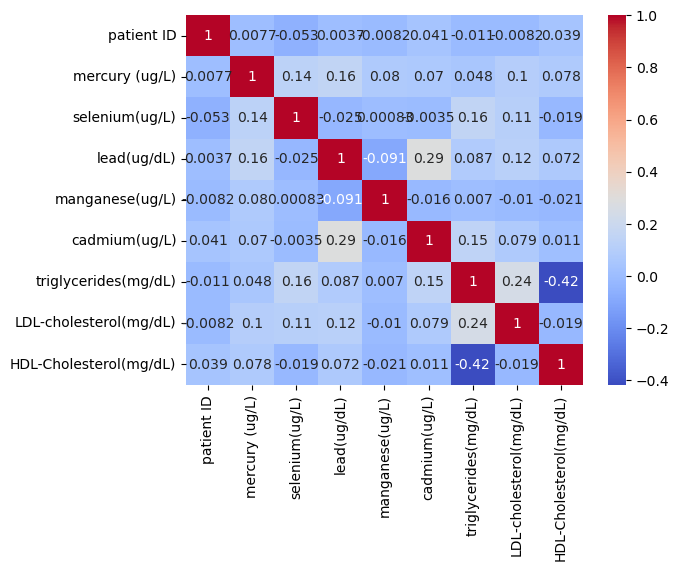

In [10]:
corr_matrix = lab_df.corr()
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [11]:
# set diagonal elements to zero
corr_matrix.values[[i for i in range(corr_matrix.shape[0])], [i for i in range(corr_matrix.shape[0])]] = 0

# print the correlation matrix with diagonal elements set to zero
print(corr_matrix)

                        patient ID  mercury (ug/L)  selenium(ug/L)  \
patient ID                0.000000        0.007720       -0.053107   
mercury (ug/L)            0.007720        0.000000        0.135168   
selenium(ug/L)           -0.053107        0.135168        0.000000   
lead(ug/dL)               0.003745        0.156329       -0.024954   
manganese(ug/L)          -0.008162        0.079885        0.000831   
cadmium(ug/L)             0.040856        0.069933       -0.003515   
triglycerides(mg/dL)     -0.010643        0.048068        0.156563   
LDL-cholesterol(mg/dL)   -0.008249        0.102874        0.114189   
HDL-Cholesterol(mg/dL)    0.038680        0.077589       -0.019119   

                        lead(ug/dL)  manganese(ug/L)  cadmium(ug/L)  \
patient ID                 0.003745        -0.008162       0.040856   
mercury (ug/L)             0.156329         0.079885       0.069933   
selenium(ug/L)            -0.024954         0.000831      -0.003515   
lead(ug/dL)    

In [12]:
# stack the correlation matrix and sort by correlation coefficient
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)

# print the top 10 correlation pairs
print(corr_pairs[:20])

cadmium(ug/L)           lead(ug/dL)               0.291458
lead(ug/dL)             cadmium(ug/L)             0.291458
LDL-cholesterol(mg/dL)  triglycerides(mg/dL)      0.244445
triglycerides(mg/dL)    LDL-cholesterol(mg/dL)    0.244445
                        selenium(ug/L)            0.156563
selenium(ug/L)          triglycerides(mg/dL)      0.156563
lead(ug/dL)             mercury (ug/L)            0.156329
mercury (ug/L)          lead(ug/dL)               0.156329
cadmium(ug/L)           triglycerides(mg/dL)      0.146854
triglycerides(mg/dL)    cadmium(ug/L)             0.146854
mercury (ug/L)          selenium(ug/L)            0.135168
selenium(ug/L)          mercury (ug/L)            0.135168
lead(ug/dL)             LDL-cholesterol(mg/dL)    0.118457
LDL-cholesterol(mg/dL)  lead(ug/dL)               0.118457
                        selenium(ug/L)            0.114189
selenium(ug/L)          LDL-cholesterol(mg/dL)    0.114189
mercury (ug/L)          LDL-cholesterol(mg/dL)    0.1028

In [13]:
# most relevant correlations are between "selenium(ug/L)" and "triglycerides(mg/dL)", "cadmium(ug/L)" and "triglycerides(mg/dL)"
# "lead(ug/dL)" and "LDL-cholesterol(mg/dL)" & "selenium(ug/L)" and "LDL-cholesterol(mg/dL)"
# create new dataframe with only relevant fields
red_lab_df = lab_df[["patient ID","selenium(ug/L)","cadmium(ug/L)","lead(ug/dL)","triglycerides(mg/dL)", "LDL-cholesterol(mg/dL)" ]]
red_lab_df.head()

,patient ID,selenium(ug/L),cadmium(ug/L),lead(ug/dL),triglycerides(mg/dL),LDL-cholesterol(mg/dL)
0,73559,209.64,0.22,1.45,51.0,56.0
1,73564,195.62,0.37,1.00,64.0,97.0
2,73580,188.00,0.07,0.31,57.0,159.0
3,73607,219.00,0.50,1.35,139.0,103.0
4,73621,212.84,0.36,1.38,78.0,70.0


In [15]:
# define the bins and labels for "triglycerides(mg/dL)" according to 
# "https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/in-depth/triglycerides/art-20048186"
bins = [0, 150, 200, 500, float('inf')]
labels = ['Normal', 'Borderline high', 'High', 'Very high']

# create a new column with the bin labels
red_lab_df['triglycerides_class'] = pd.cut(red_lab_df['triglycerides(mg/dL)'], bins=bins, labels=labels)

# define the bins and labels for "LDL-cholesterol(mg/dL)" acccording to 
# "https://www.mayoclinic.org/tests-procedures/cholesterol-test/about/pac-20384601"
bins = [0, 130, 160, 190, float('inf')]
labels = ['Normal', 'Borderline high', 'High', 'Very high']

# create a new column with the bin labels
red_lab_df['LDL-cholesterol_class'] = pd.cut(red_lab_df['LDL-cholesterol(mg/dL)'], bins=bins, labels=labels)

red_lab_df.sample(20)

C:\Users\Victor\AppData\Local\Temp\ipykernel_451596\1030783138.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_lab_df['triglycerides_class'] = pd.cut(red_lab_df['triglycerides(mg/dL)'], bins=bins, labels=labels)
C:\Users\Victor\AppData\Local\Temp\ipykernel_451596\1030783138.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_lab_df['LDL-cholesterol_class'] = pd.cut(red_lab_df['LDL-cholesterol(mg/dL)'], bins=bins, labels=labels)


,patient ID,selenium(ug/L),cadmium(ug/L),lead(ug/dL),triglycerides(mg/dL),LDL-cholesterol(mg/dL),triglycerides_class,LDL-cholesterol_class
1178,81119,203.96,0.13,0.32,127.0,112.0,Normal,Normal
867,79296,197.99,0.76,1.81,162.0,127.0,Borderline high,Normal
593,77581,216.31,0.18,0.31,161.0,109.0,Borderline high,Normal
1428,82821,192.79,0.12,1.13,67.0,106.0,Normal,Normal
157,74687,188.07,0.07,0.30,28.0,61.0,Normal,Normal
840,79146,204.72,0.07,0.88,68.0,104.0,Normal,Normal
1360,82376,201.28,0.18,1.19,42.0,155.0,Normal,Borderline high
886,79416,183.56,0.34,1.24,158.0,65.0,Borderline high,Normal
95,74239,237.27,0.38,0.96,294.0,139.0,High,Borderline high
1204,81317,170.13,0.26,0.35,105.0,95.0,Normal,Normal
